<a href="https://colab.research.google.com/github/Lindaagstna/LatihanEDA07/blob/main/Tugas_Pertemuan07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SEMESTER3/praktikum_eda/pekan7/data/Salary_Data_Tugas EDA.xlsx - Sheet1.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,NaN,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


# **CLEANSING DATA**

In [ ]:
df.duplicated().sum()

np.int64(4913)

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# --- mengecek ukuran data jumlah dan kolom ---
print("Ukuran dataset", df.shape)

Ukuran dataset (1787, 6)


In [ ]:
# --- cek jumlah total elemen dalam dataset ---
print("Jumlah total:", df.size)

Jumlah total: 10722


In [ ]:
# --- cek tipe data dari sebuah variabel ---
variabel = "hello"
print("tipe data variabel", type(variabel))

number = 123
print("tipe data number", type(number))

# --- cek tipe data dari setiap kolom df ---
print("\nTipe data kolom")
print(df.dtypes)

tipe data variabel <class 'str'>
tipe data number <class 'int'>

Tipe data kolom
Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [ ]:
missing_values = df.isnull().sum()
print("jumlah nilai yang hilang")
print(missing_values)

jumlah nilai yang hilang
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print("jumlah nilai yang hilang")
print(missing_values)

jumlah nilai yang hilang
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:
print(f"Jumlah baris setelah dihapus: {len(df)}")

Jumlah baris setelah dihapus: 1787


In [ ]:
# --- menghitung jumlah baris duplikat ---
duplicate_rows_count = df.duplicated().sum()
print("Jumlah baris duplikat:", duplicate_rows_count)

Jumlah baris duplikat: 0


In [ ]:
#  --- menampilkan beberapa baris duplikat pertama jika ada ---
if duplicate_rows_count > 0:
   print("\nBeberapa baris duplikat pertama:")
display(df[df.duplicated (keep=False)].head())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


# **VISUALISASI**

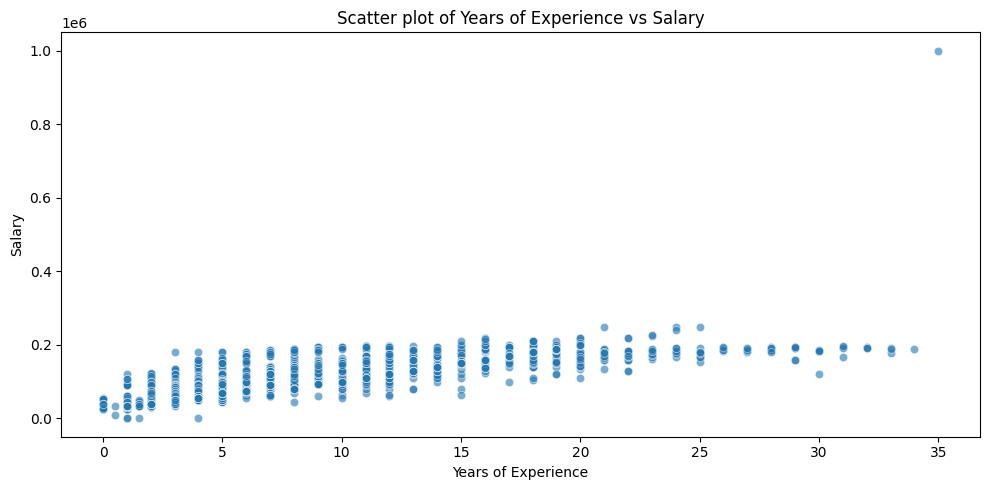

In [ ]:
numerical_cols_scatter = ['Years of Experience', "Salary"]
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=numerical_cols_scatter[0], y=numerical_cols_scatter[1], alpha=0.6)
plt.title(f'Scatter plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()

In [ ]:
# --- menampilkan korelasi antara 2 variabel ---
correlation = df['Years of Experience'].corr(df['Salary'])
print("Korelasi antara 'Years of Experience' dan 'Salary':", correlation)

Korelasi antara 'Years of Experience' dan 'Salary': 0.7888278070833243


In [ ]:
# --- menghitung koefesien determinasi ---
r_squared = correlation ** 2
print("Koefisien Determinasi (R^2):", r_squared)

Koefisien Determinasi (R^2): 0.6222493092278863


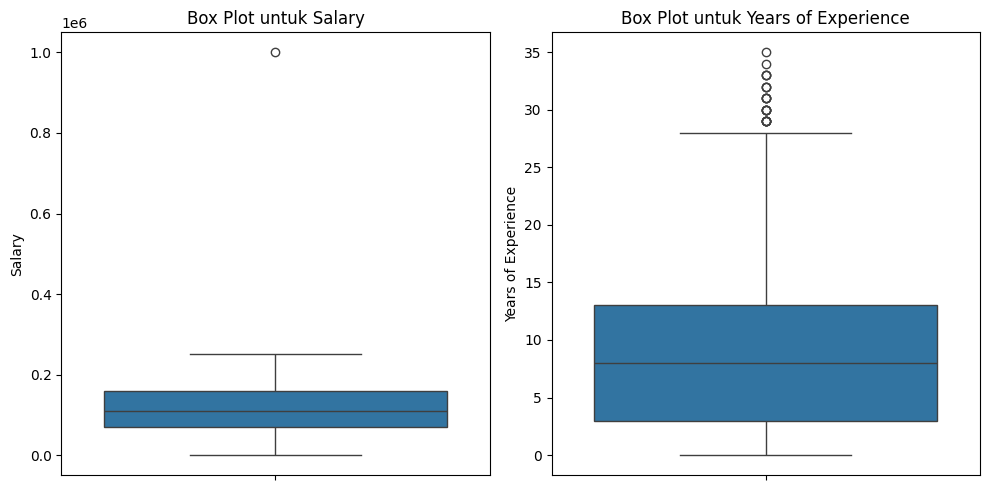

In [ ]:
# --- visualisasi kolom numerik untuk mendeteksi outlier (Box Plot) ---
numerical_cols_outliers = ['Salary', 'Years of Experience']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols_outliers, 1):
  plt.subplot(1, 2, i)
  sns.boxplot(data=df, y=col)
  plt.title(f'Box Plot untuk {col}')
  plt.ylabel(col)
plt.tight_layout()
plt.show()

Setelah pembersihan, data dianalisis untuk outlier menggunakan metode kuartil range pada data numerik.

--- Membersihkan outlier untuk kolom: Salary ---
Q1: 70000.0, Q3: 160000.0, IQR: 90000.0
Batas Bawah: -65000.0, Batas Atas: 295000.0
Jumlah outlier yang dihapus: 1
Jumlah baris tersisa: 1786

--- Membersihkan outlier untuk kolom: Years of Experience ---
Q1: 3.0, Q3: 13.0, IQR: 10.0
Batas Bawah: -12.0, Batas Atas: 28.0
Jumlah outlier yang dihapus: 22
Jumlah baris tersisa: 1764

--- Proses pembersihan outlier selesai ---
Bentuk data asli (df): (1787, 6)
Bentuk data baru (df_bersih): (1764, 6)


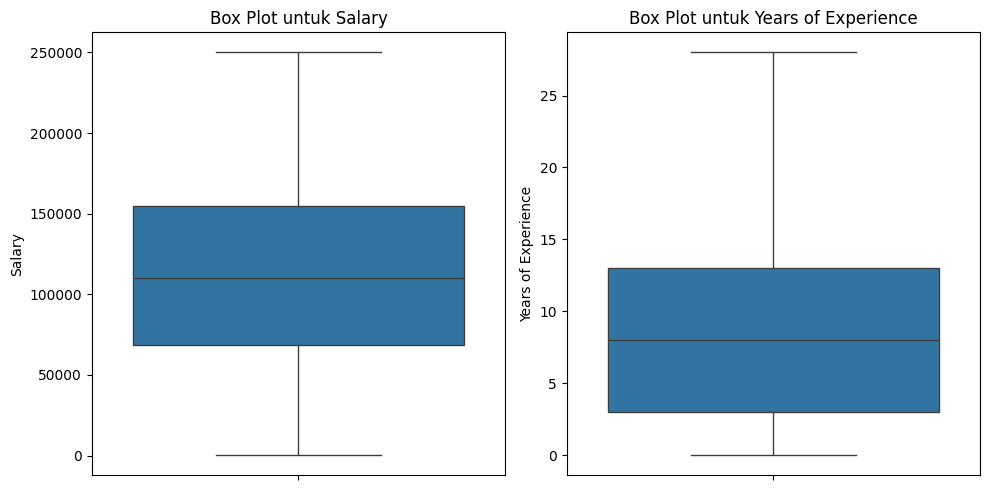

In [ ]:
# --- membuat data salinan agar tidak berubah ---
df_bersih = df.copy()

# --- menentukan outlier ---
numerical_cols_outliers = ['Salary', 'Years of Experience']

for col in numerical_cols_outliers:
    print(f"--- Membersihkan outlier untuk kolom: {col} ---")

    # --- menghitung Q1 (Kuartil 1) dan Q3 (Kuartil 3) ---
    Q1 = df_bersih[col].quantile(0.25)
    Q3 = df_bersih[col].quantile(0.75)

    # --- menghitung quartil ---
    IQR = Q3 - Q1

    # --- menentukan batas bawah dan batas atas ---
    batas_bawah = Q1 - (1.5 * IQR)
    batas_atas = Q3 + (1.5 * IQR)

    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Batas Bawah: {batas_bawah}, Batas Atas: {batas_atas}")

    # --- menyimpan baris sebelumnya ---
    jumlah_baris_sebelumnya = df_bersih.shape[0]

    # --- mengambil data pada data batas bawah dan atas ---
    df_bersih = df_bersih[(df_bersih[col] >= batas_bawah) &
                           (df_bersih[col] <= batas_atas)]

    # --- menyimpan jumlah baris setelah dihapus ---
    jumlah_baris_setelahnya = df_bersih.shape[0]
    jumlah_outlier = jumlah_baris_sebelumnya - jumlah_baris_setelahnya

    print(f"Jumlah outlier yang dihapus: {jumlah_outlier}")
    print(f"Jumlah baris tersisa: {jumlah_baris_setelahnya}\n")

print("--- Proses pembersihan outlier selesai ---")
print(f"Bentuk data asli (df): {df.shape}")
print(f"Bentuk data baru (df_bersih): {df_bersih.shape}")

numerical_cols_outliers = ['Salary', 'Years of Experience']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols_outliers, 1):
  plt.subplot(1, 2, i)
  sns.boxplot(data=df_bersih, y=col)
  plt.title(f'Box Plot untuk {col}')
  plt.ylabel(col)
plt.tight_layout()
plt.show()

Hasil Shapiro-Wilk: statistik = 0.8797,p=value0.0000
Data tidak berdistribusi normal (tolak H0)


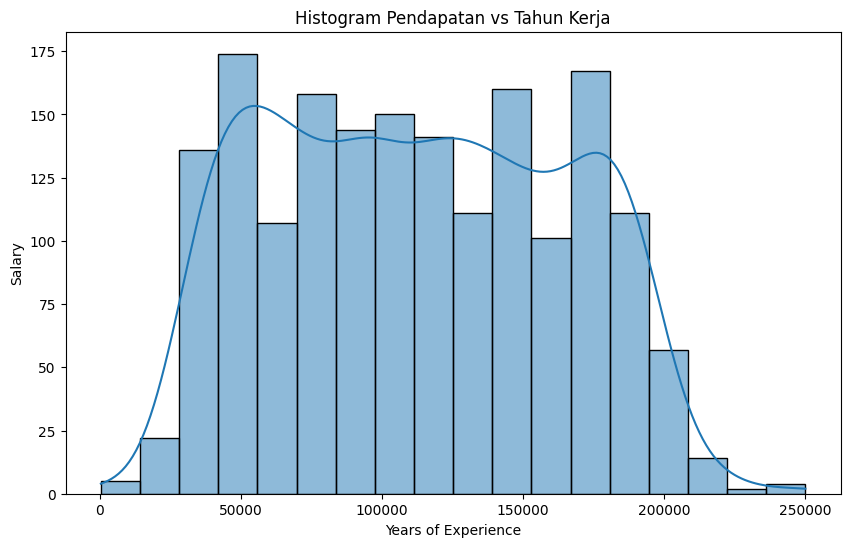

In [ ]:
shapiro_test = stats.shapiro(df['Salary'])
print(f"Hasil Shapiro-Wilk: statistik = {shapiro_test.statistic:.4f},p=value{shapiro_test.pvalue:.4f}")
alpha = 0.05
if shapiro_test.pvalue > alpha:
  print("Data kemungkinan berdistribusi normal (gagal menolak H0)")
else:
  print("Data tidak berdistribusi normal (tolak H0)")
plt.figure(figsize=(10, 6))
sns.histplot(df_bersih['Salary'], kde=True)
plt.title('Histogram Pendapatan vs Tahun Kerja')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# **KESIMPULAN:😇**
Kesimpulannya adalah lama pengalaman terbukti menjadi faktor utama yang memengaruhi gaji dalam dataset. Mengapa? karena memiliki korelasi yang positif dan kuar yaitu sebesar 0,788 antara kedua variabel, berarti semakin lama pengalaman kerja gaji akan cenderung semakin tinggi. Nilai koefesien determinasi R^2 sebesar 0,622 atau 62,2%, berarti sebesar 62,2% variasi gaji dapat dijelaskan dengan lamanya pengalaman bekerja. Data ini telah melewati proses data cleansing yang ekstensif, dimana 4913 baris duplikat, data yang hilang NaN, dan outlier sebanyak 23 berhasil dihapus menggunakan kode dropna lalu menyisakan 1764 data bersih. Selain itu, analisis data gaji menggunakan Uji Shapiro-Wilk menghasilkan statistik = 0.8797,p=value0.0000, ini membuktikan bahwa data tidak terdistribusi secara normal dan cenderung miring ke kanan atau *right-skewed*.